In [57]:
import treeffuser as tf
import numpy as np
import matplotlib.pyplot as plt
from treeffuser._score_models import LightGBMScore
from treeffuser._sdes import VESDE

# load autoreload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
n = 1000
X_train1 = np.random.rand(n, 1)
y_train1 = X_train1 + np.random.randn(n, 1) * 0.05

X_train2 = np.random.rand(n, 1)
y_train2 = -X_train2 + np.random.randn(n, 1) * 0.05


X_train = np.concatenate([X_train1, X_train2], axis=0)
y_train = np.concatenate([y_train1, y_train2], axis=0)

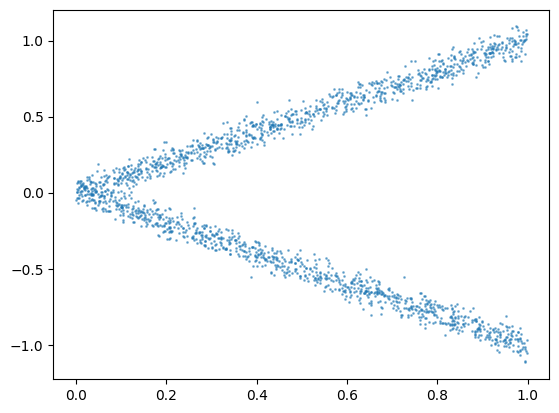

In [60]:
plt.scatter(X_train, y_train, alpha=0.5, s=1)



In [83]:
sde = VESDE(sigma_max=50)
score_model = LightGBMScore(sde=sde, verbose=1, n_repeats=100, n_estimators=10000, learning_rate=0.01, likelihood_reweighting=True, early_stopping_rounds=20, eval_percent=0.1)#, n_estimators=100, n_repeats=10)
score_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003251 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 200000, number of used features: 3
[LightGBM] [Info] Start training from score 0.000032
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[711]	valid_0's l2: 723.417


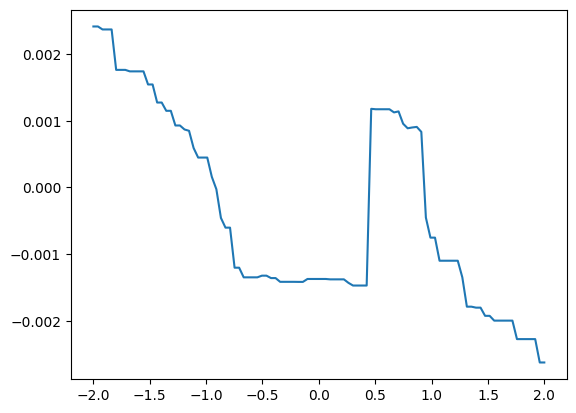

In [95]:
# For t = 0.5 plot the gradient that we get
t = 0.9
x = np.ones(100).reshape(-1,1) * 1
y = np.linspace(-2, 2, 100).reshape(-1, 1)
t_vec = np.ones(100) * t

score = score_model.score(y,x, t_vec)

plt.plot(y, score, label='score')
# Draw it as arrows
#for i in range(0, 100, 10):
#    plt.arrow(0.5, y[i], 0, score[i], head_width=0.05, head_length=0.1, fc='k', ec='k')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000560 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 200000, number of used features: 3
[LightGBM] [Info] Start training from score -0.000005


100%|██████████| 10/10 [00:16<00:00,  1.68s/it]


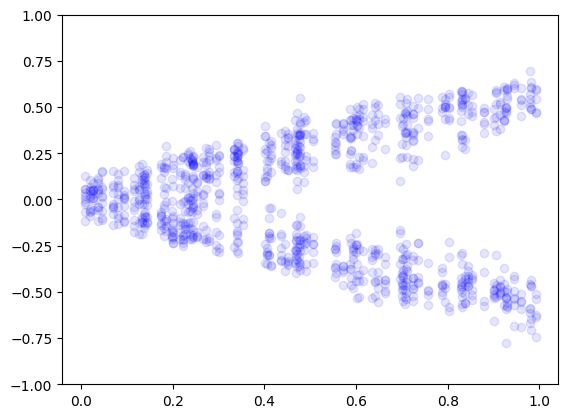

In [90]:
from treeffuser import LightGBMTreeffusser

model = LightGBMTreeffusser(
    verbose=1,
    n_repeats=100,
    n_estimators=10000,
    likelihood_reweighting=True,
    sde_name='vesde',
    learning_rate=0.005,
)
model.fit(X_train, y_train)

n_samples = 10
# shape (n , n_samples, y_dim)
X_sample = X_train[:100]
y_samples = model.sample(X_sample, n_samples=n_samples, n_parallel=10, denoise=True, n_steps=100, seed=0)
X_repeated = np.repeat(X_sample, n_samples, axis=0)



plt.scatter(X_repeated, y_samples, alpha=0.1, color='blue', label='Samples')
# set axis to -1, 1
plt.ylim(-1, 1)
plt.show()


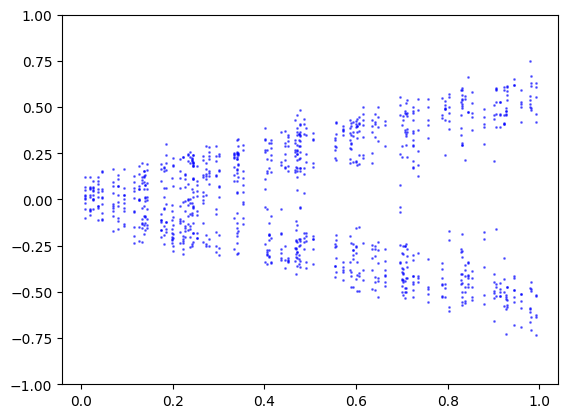

In [76]:
plt.scatter(X_repeated, y_samples, alpha=0.5, color='blue', label='Samples', s=1)
# set axis to -1, 1
plt.ylim(-1, 1)
plt.show()
